# Challenges week 5

Now that you have some experience with working with wrangling, visualisation and statistics in Python, it's time for you to combine and apply your knowledge. You will start working on these challenges in the tutorial and will be asked to complete them by the end of the week. 

In each challenge, you are asked to provide the programing solution to it as well as a technical interpretation explaining the steps taken and the result.

Some important notes for the challenges:

* If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next excercise (but make sure to hand it in).
* We will make sure to provide feedback and improvement suggestions in the rubric. Make sure to read them; they will help you improve next week.

## Dataset

This week you will work with a new dataset. It is a data on U.S. partisan news pages on Facebook. This data was collected and analyzed by Silverman et al. (2017) for this article published on BuzzFeed [Inside The Partisan Fight For Your News Feed](https://www.buzzfeednews.com/article/craigsilverman/inside-the-partisan-fight-for-your-news-feed). The file you will work with is created based on the data available in this [GitHub repository](https://github.com/BuzzFeedNews/2017-08-partisan-sites-and-facebook-pages). 

In their investigation, the authors created a list of 667 partisan news websites. The websites were added to the list manually by two journalists who were dedicated to identifying partisan news websites. Once a website was added, its associated Facebook page was identified. This was possible for 452 websites. Information on these Facebook pages was collected using the Facebook API. Next, the websites were classified as left- or right-leaning based on a manual review of the content published by the website and its Facebook page, and by examining their About pages for mentions of partisanship. In datasets you will use, you can find information on the Facebook pages, their political leaning as well as information on enagagement. 

In the challenge you will use the following files:
- `pages-info.csv` - dataset about the identified Facebook pages. It contains the following information:
    - page_name:  name of the page on Facebook
    - about: description of the page
    - fan_count: number of fans
    - talking_about_count: number of people sharing stories about the page
    - website: name of the website related to the page
    - page_id: ID of the Facebook page
    - year: year when the page was created
    - left_leaning: political left leaning of the page (takes value 1 for pages identified as left leaning and 0 for others)
    - left_leaning: political right leaning of the page (takes value 1 for pages identified as right leaning and 0 for others)
- `engagement_weekly.csv` - dataset about engagement with the identified pages in the last week before 2016 US presidential electiosn. It contains the following information:
    - page_id: ID of the Facebook page
    - status_published: the period for which engagement was measures (in this case, it is the first week of November 2016 for all pages).
    - total_engagement: total number of engagement with the page in the week
    - num_reactions: total number of reactions posts by the page recieved in the week (including all possible Facebook reactions)
    - num_comments: total number of comments posts by the page recieved in the week
    - num_shares: total number of times posts by the page have been shared in the week
    - num_likes: total number of likes posts by the page recieved in the week
    - num_loves: total number of 'love' reactions posts by the page recieved in the week
    - num_wows: total number of 'wow' reactions posts by the page recieved in the week
    - num_hahas: total number of 'haha' reactions posts by the page recieved in the week
    - num_sads: total number of 'sad' reactions posts by the page recieved in the week
    - num_angrys: total number of 'angry' reactions posts by the page recieved in the week
    - post_count: total numer of posts posted in the week

# Challange 1 

Let's start with preparing and exploring the datasets. 
1) Explore the dataset and the necessary variables. <br /> *Make sure to at least check how the dataset looks like, what columns it has, what data type these columns have. <br />Tip: have a look at week 4 for pandas commands useful for exploration.*
2) Merge the two datasets so that you have information on pages and the engagement they generated in the last week before the 2016 presidential elections together.  <br />*Tip: do not forget to make sure both datasets have the right keys necessary for merging and that these keys have the appropriate data types*
3) To get a global picture of your data answer the questions below. If necessary, create new columns in your dataset necessary to answer the questions.
    - How many pages in the dataset are left and how many right leaning? 
    - When (in what year) were the pages in the dataset created?
    - What is the averge number of fans for left and right leaning websites?
    

For each question, provide the necessary code and a short explanation of the choices you made.

In [1]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# for t-tests function:
import pingouin as pg  
import numpy as np

Q1: data exploration

In [2]:
#reading the csv file
pages = pd.read_csv('pages-info.csv', delimiter = ",")
pages.shape

/home/damian/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/damian/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


(452, 12)

In [3]:
#Showing first 5 rows
pages.head()

,Unnamed: 0,page_name,about,fan_count,talking_about_count,website,page_id,year,month,day,left_leaning,right_leaning
0,0,Americans Against the Tea Party,We are your go to source for political news.,583256,43343,http://www.aattp.org,108038612554992,2009.0,4.0,3.0,1,0
1,1,act.tv,Rise up and Resist! Your home for movement-ori...,285075,481748,http://act.tv,153418591515382,NaN,NaN,NaN,1,0
2,2,New Blue United,NaN,1476093,93116,www.bluetribune.com,188464111175168,NaN,NaN,NaN,1,0
3,3,Obama is the Worst President in US History,NaN,1569590,41452,NaN,296856040436954,2013.0,1.0,1.0,0,1
4,4,RedFlag NewsDesk,Daily headlines from the official RedFlagNews....,1533,76,http://redflagnews.com,492836854251934,2016.0,3.0,16.0,0,1


In [4]:
#Checking dtypes
pages.dtypes

Unnamed: 0               int64
page_name               object
about                   object
fan_count                int64
talking_about_count      int64
website                 object
page_id                  int64
year                   float64
month                  float64
day                    float64
left_leaning             int64
right_leaning            int64
dtype: object

In [5]:
#Checking missing values
pages.isna().sum()

Unnamed: 0               0
page_name                0
about                   26
fan_count                0
talking_about_count      0
website                 29
page_id                  0
year                   241
month                  332
day                    362
left_leaning             0
right_leaning            0
dtype: int64

The file contains 452 rows and 12 columns. Majority of the columns is numeric. There are some missing values for some of the columns

Q2: Merging

In the next step, I will merge information on pages with information on the engagement they have recieved. For the merge I need:
* key to merge on
* the key needs the same datatype
* the key needs to be unique.

In [6]:
engagement = pd.read_csv('engagement_weekly.csv')
engagement.shape

(415, 14)

In [7]:
#Showing first 5 rows
engagement.head()

,Unnamed: 0,page_id,status_published,total_engagement,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_count
0,22,100434040001314,2016-11-01,49741,35318,3105,11318,22950,1906,697,4554,1206,4005,250
1,31,1014803551921469,2016-11-01,155745,95926,18311,41508,72594,5620,2233,5912,1000,8567,1289
2,49,1019871961378419,2016-11-01,1192782,900218,170192,122372,675544,47614,16100,38434,73706,48820,1260
3,60,1035617169863710,2016-11-01,2506,1497,267,742,1115,62,35,199,14,72,197
4,70,1036253643101134,2016-11-01,656574,474432,43802,138340,359882,23549,13228,25017,6682,46074,136


In [8]:
#Checking dtypes
engagement.dtypes

Unnamed: 0           int64
page_id              int64
status_published    object
total_engagement     int64
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
post_count           int64
dtype: object

In [9]:
#Checking missing values
engagement.isna().sum()

Unnamed: 0          0
page_id             0
status_published    0
total_engagement    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
post_count          0
dtype: int64

In [10]:
#Checking lenght of dataframes
len(pages), len(engagement)

(452, 415)

I can see that there is page_id, which does not have missing values and is an integer in both dataframes. The name of the id is identical for both dataframes.

The dataframes do not have identical lenght. As I want to add information on engagement to the information on pages I have, I will merge inner so that I only keep the pages that I have engagement data on. <br> *Here, you could have also chosen for a different kind of merge, but you would need to explain why it is appropriate (e.g., why you want to keep pages that do not have engagement information.* 

In [11]:
df = pages.merge(engagement, on='page_id', how='inner')

In [12]:
#Checking lenght of the resulting dataframe
len(df)

415

Q3: exploratory analysis
* How many pages in the dataset are left and how many right leaning?

In [13]:
#Checking columns to see what I need
df.columns

Index(['Unnamed: 0_x', 'page_name', 'about', 'fan_count',
       'talking_about_count', 'website', 'page_id', 'year', 'month', 'day',
       'left_leaning', 'right_leaning', 'Unnamed: 0_y', 'status_published',
       'total_engagement', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'post_count'],
      dtype='object')

In [14]:
df['left_leaning'].value_counts()

0    285
1    130
Name: left_leaning, dtype: int64

In [15]:
df['right_leaning'].value_counts()

1    285
0    130
Name: right_leaning, dtype: int64

In [16]:
# maybe for the fun of it check whether this is mutually exclusive?
pd.crosstab(df['left_leaning'], df['right_leaning'])

right_leaning,0,1
left_leaning,,
0,0,285
1,130,0


There are 285 right leaning pages and 130 left leaning. <br> Observation: It looks like `'right_leaning'` and `'left_leaning'` are exclusive variables (none of the pages is both left and right leaning which makes sense).

* When (in what year) were the pages in the dataset created?

In [17]:
# potentially, you could do df['year'].value_counts() additionally or instead

df['year'].describe()

count     202.000000
mean     2000.272277
std        32.705228
min      1776.000000
25%      2002.000000
50%      2010.000000
75%      2013.000000
max      2016.000000
Name: year, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Count'>

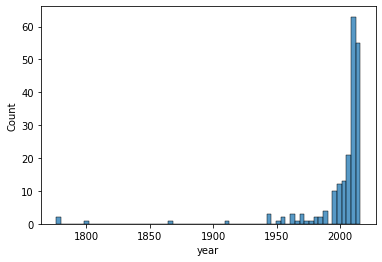

In [18]:
# alternatively, use a graphic solution:
sns.histplot(x='year', data=df)

It looks like the first page was created in 1776 (which makes ne sense and might be an error) and the last one in 2016. Most pages were created after 2010.

* What is the averge number of fans for left and right leaning websites?

In [19]:
df.groupby('left_leaning')['fan_count'].describe()

,count,mean,std,min,25%,50%,75%,max
left_leaning,,,,,,,,
0,285.0,738682.014035,1.439927e+06,47.0,19880.00,165298.0,853119.00,15563283.0
1,130.0,744491.284615,1.669226e+06,64.0,25474.25,166985.0,727282.25,11664950.0


It looks like left leaning pages have on average 738682 fans, while right leaning pages 744491. SD is large for both types of pages. So there is probably no substantive difference.

<AxesSubplot:xlabel='left_leaning', ylabel='fan_count'>

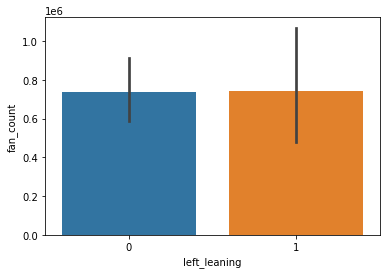

In [20]:
# alterantively, use a graphic solution
sns.barplot(y='fan_count', x='left_leaning', data=df)

# Challenge 2

Now, let's visualize what we have learned about our data. Provide visualizations for your answers to question 3, Challenge 1. Take into account the measurement levels of your variables to choose the appropriate visualization. Provide a short justification of your choice.

*Solutions show example plots. Other plots are also acceptable as long as they fit the measurement level of your variables.*


* How many pages in the dataset are left and how many right leaning?

As this variable is categorical, bar chart is appropriate.

<AxesSubplot:xlabel='left_leaning', ylabel='count'>

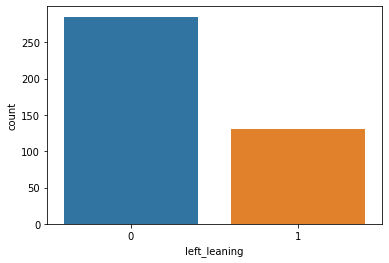

In [21]:
# with seaborn
sns.countplot(x = 'left_leaning', data=df)

* When (in what year) were the pages in the dataset created?

<AxesSubplot:xlabel='year', ylabel='Count'>

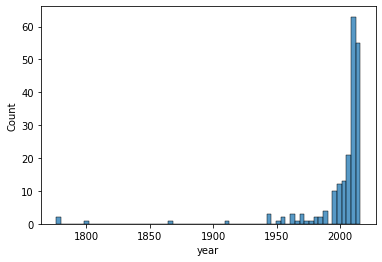

In [22]:
sns.histplot(x='year', data=df)

* What is the averge number of fans for left and right leaning websites?

I choose a barplot as my IV is binary (leaning) and DV continous (number of fans).

<AxesSubplot:xlabel='left_leaning', ylabel='fan_count'>

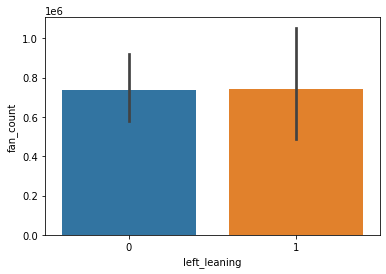

In [23]:
sns.barplot(x="left_leaning", y="fan_count", data=df, ci=95)

# Challenge 3 

Imagine that you are conducting research on engagement with partisan news sites in pre-election period. You are interested in the following research question:

*RQ*: To what extent is there a relation between political leaning of a news site on Facebook and the amount of engagement it recieves?

In the final challenge, we ask you to answer the research question above. To answer the research question you need to:
* Choose appropriate independent and dependent variable and shortly justify your choice.
* Compute descriptive statistics for the chosen independent and dependent variable and interpret them. Explain your choice for the descriptives type. <br />*For this step, compute overall descritpive statistics for the independent and dependent variable separately. Make sure to choose the right statistical information to report depending on the measurement level of your variable.*
* Create one univariate visualisation for the independent variable. Provide a short justification of your choice for visualisation type. <br />*Make sure to choose the appropriate visualisation for the selected variable*
* Create one univariate visualisation for the dependent variable. Provide a short justification of your choice for visualisation type. <br />*Make sure to choose the appropriate visualisation for the selected variable*
* Create one bivariate visualisation showing the relation between the independent and dependent variable. Provide a short justification of your choice for visualisation type. <br />*Make sure to choose the appropriate visualisation for the two variables*
* Show the descriptives of the dependent variable grouped by the independent variable and interpret them.
* Conduct appropriate statistical test, interpret the results and answer the RQ. <br />*Tip: consider the measurement levels of your variables to choose the appropriate test. You do not have to conduct any tests not shown in class*


1.

IV: political leaning `'left_leaning'` - this categorical variable shows leaning of the page. The page scores 1 when it is left leaning

DV: total engagement score in a week `'total_engagement'` - this continous variable shows the total engagement recieved by the page

*Using other variables measuring engagement would also be ok as long as they represent some sort of engagement (e.g., likes)*.

2. 

In [24]:
#Descriptive statistics for IV
df['left_leaning'].value_counts()

0    285
1    130
Name: left_leaning, dtype: int64

In [25]:
df['left_leaning'].value_counts(normalize=True)

0    0.686747
1    0.313253
Name: left_leaning, dtype: float64

In [26]:
#Descriptive statistics for DV
df['total_engagement'].describe()

count    4.150000e+02
mean     1.420831e+06
std      4.415878e+06
min      0.000000e+00
25%      2.731000e+03
50%      9.002600e+04
75%      1.048194e+06
max      5.268795e+07
Name: total_engagement, dtype: float64

In the dataset 68% of pages is right leaning. Overall, pages recieved 1.420831e+06 = 1420831 engagement with SD of 4.415878e+06 = 4415877.

*Note that by default the results are shown in scientific notation.*

In [27]:
#Bonus: this setting allows you to round output which will prevent numbers being displayed in mathematical notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
df['total_engagement'].describe()

count        415.00000
mean     1420831.18313
std      4415877.72300
min            0.00000
25%         2731.00000
50%        90026.00000
75%      1048194.00000
max     52687952.00000
Name: total_engagement, dtype: float64

3. To visualize IV (binary) I choose bar chart.

<AxesSubplot:xlabel='left_leaning', ylabel='count'>

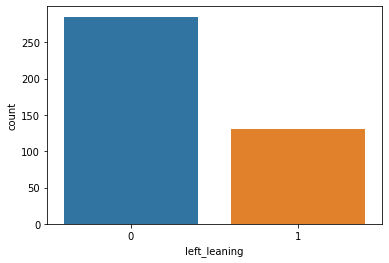

In [29]:
# with seaborn
sns.countplot(x = 'left_leaning', data=df)

4. To visualize DV (continous) I choose histogram. I have made it bigger to increase clarity.

<AxesSubplot:xlabel='total_engagement', ylabel='Count'>

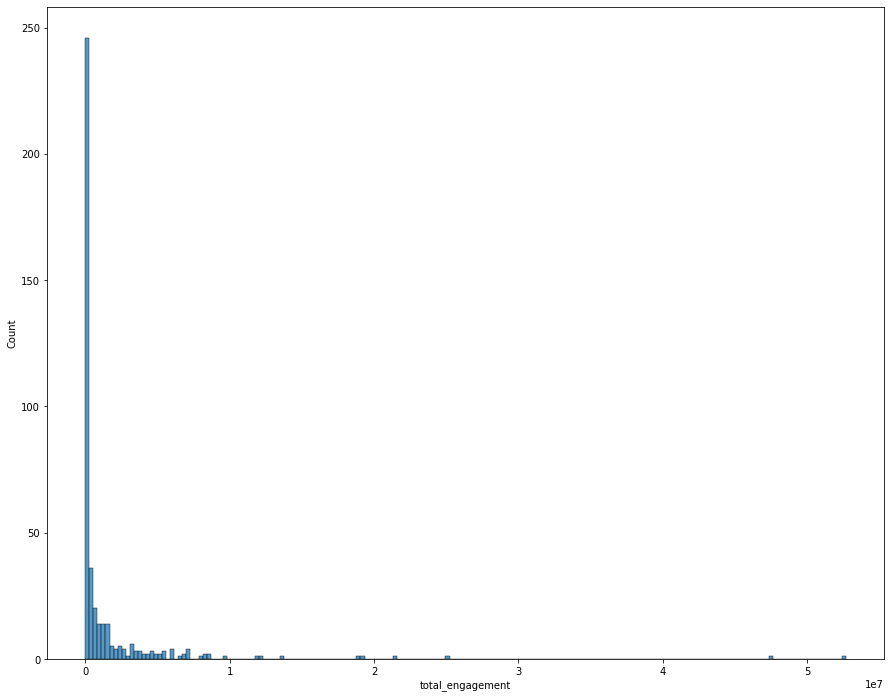

In [30]:
plt.figure(figsize = (15,12))
sns.histplot(data=df, x='total_engagement')

5. To visualize the relation between binary IV and continous DV I create a bar chart. It shows me the means per group and 95% confidence intervals around the mean.

<AxesSubplot:xlabel='left_leaning', ylabel='total_engagement'>

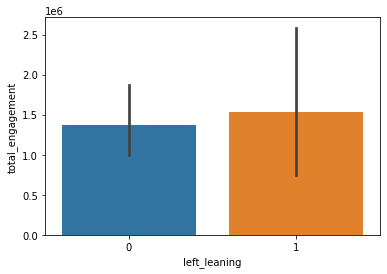

In [31]:
sns.barplot(x="left_leaning", y="total_engagement", data=df, ci=95)

6. Descriptives per category.

In [32]:
df.groupby('left_leaning')['total_engagement'].describe()

,count,mean,std,min,25%,50%,75%,max
left_leaning,,,,,,,,
0,285.00000,1370236.90877,3834546.61819,0.00000,2506.00000,80215.00000,1114040.00000,47573041.00000
1,130.00000,1531749.40000,5494745.07015,2.00000,3030.50000,110070.50000,786239.75000,52687952.00000


On average left leaning pages have recieved more engagement (M =  1531749) than right leaning pages (M = 1370236). For both types of pages, SD is large with high maximium engagement.

7. To find out if the differnece is significant, I conduct an independent sample t-test. Before, I do a Levene's test to check if I can assume variance indifference between groups.

In [33]:
# Damian's function to provide a simple way to display the results of a t-test
# Note: pg.ttest() automatically checks for equality of variances (see pg.ttest? )
# so you don't have to do this manually. Take that, SPSS!!!

def pandasttest(df, dv, between):
    '''Takes a dataframe, the name of the column that indicates the group (`between`), 
    and the name of the column that contains the dependent variable (`dv`) as
    input and then prints a t-test'''
    
    assert len(df[between].unique())==2, "There are more than two groups, aborting"
             
    (label1, values1), (label2, values2) = df.groupby(between)[dv]
    testresult = pg.ttest(values1, values2)
    display(testresult)
    print(f"The difference between group {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
         f"and group {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}) "
         f"is {'not ' if not (testresult['p-val']<.05).iloc[0] else''}significant, "
         f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
         f"p={testresult.iloc[0,3]:.4f}.")


In [34]:
pandasttest(df, dv = 'total_engagement', between = 'left_leaning')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.30316,188.45437,two-sided,0.76210,"[-1212464.35, 889439.37]",0.03654,0.122,0.06370


The difference between group 0 (M=1370236.91, SD=3827813.432) and group 1 (M=1531749.40, SD=5473570.637) is not significant, t(188.4543697961352)=-0.303, p=0.7621.


Based on the t-test I can conclude that the differnece in engagement between left- and right-leaning pages is not significant. Hence, the answer to the RQ is that there is no relation between the political leaning of the page and the amount of engagement it has recieved.